┌ Info: Saved animation to 
│   fn = C:\Users\latzko\work\julampd\scripts\anim_fps15.gif
└ @ Plots C:\Users\latzko\.julia\packages\Plots\VA7Vx\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\latzko\\work\\julampd\\scripts\\anim_fps15.gif")
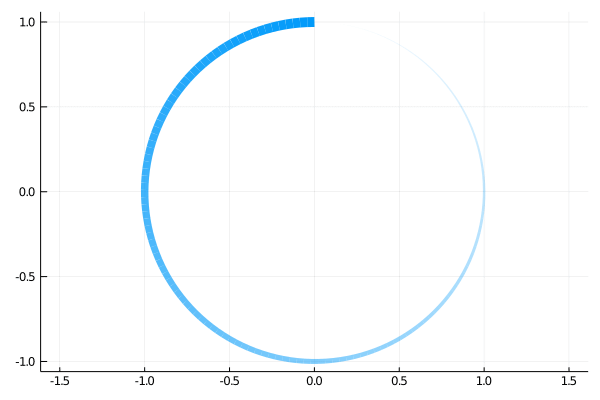

In [4]:
using Plots

@userplot CirclePlot
@recipe function f(cp::CirclePlot)
    x, y, i = cp.args
    n = length(x)
    inds = circshift(1:n, 1 - i)
    linewidth --> range(0, 10, length = n)
    seriesalpha --> range(0, 1, length = n)
    aspect_ratio --> 1
    label --> false
    x[inds], y[inds]
end

n = 150
t = range(0, 2π, length = n)
x = sin.(t)
y = cos.(t)

anim = @animate for i ∈ 1:n
    circleplot(x, y, i)
end
gif(anim, "anim_fps15.gif", fps = 15)

In [4]:
using Plots
using LinearAlgebra


In [98]:
function polyfit(x::Array{<:Number, 1}, y::Array{<:Number, 1}, degree=1)
    X = ones(length(x), degree + 1)
    for j ∈ 1:length(x)
        for i ∈ 1:degree
            X[j, i + 1] = x[j]^i 
        end
    end

    ixx = pinv(transpose(X) * X)
    B = ixx * transpose(X) * y

    return B
end

polyfit (generic function with 2 methods)

In [46]:
D = [1;2; 3]
E = [3.; 2.; 2.]
X = ones(length(D), 3)
print(X)
#polyfit(D, E)

[1.0 1.0 1.0; 1.0 1.0 1.0; 1.0 1.0 1.0]

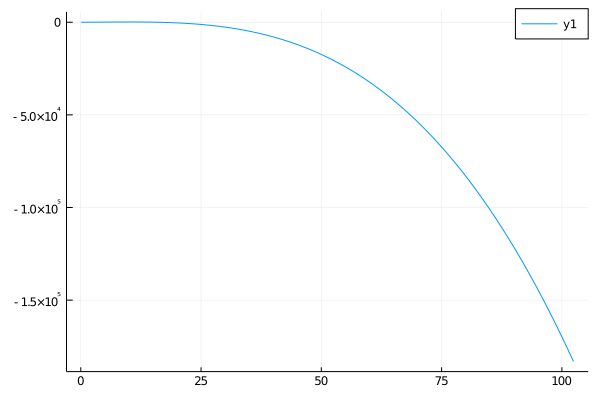

In [21]:

x = zeros(1024)

for i ∈ 1:1024
    x[i] = i * .1
end

y = 3 .* x.^2 + x .* 2 .+ 10 + x.^3 .* -0.2
plot(x, y)

In [97]:

degree = 3
X = ones(length(x), degree + 1)
for j ∈ 1:length(x)
    for i ∈ 1:degree
        X[j, i + 1] = x[j]^i 
    end
end

ixx = pinv(transpose(X) * X)
B = ixx * transpose(X) * y

print(B)
print(size(X))

[10.000025485629067, 1.999998122844545, 3.0000000367569406, -0.20000000020964653](1024, 4)

In [100]:
@time p = polyfit(x, y, 1)

  0.000073 seconds (29 allocations: 35.250 KiB)


2-element Array{Float64,1}:
 37848.366999999176
 -1581.0095999999887

In [ ]:
XX[09, 0],





In [24]:
@time LinearAlgebra.pinv(A + B)

  0.000038 seconds (26 allocations: 3.047 KiB)


3×2 Array{Float64,2}:
  0.119808  -0.0367412
  0.365815  -0.21885
 -0.188498   0.204473

In [18]:
using CUDA

W = cu(rand(2, 5)) # a 2×5 CuArray
b = cu(rand(2))

predict(x) = W*x .+ b
loss(x, y) = sum((predict(x) .- y).^2)

x, y = cu(rand(5)), cu(rand(2)) # Dummy data
loss(x, y) # ~ 3

┌ Warning: `haskey(::TargetIterator, name::String)` is deprecated, use `Target(; name = name) !== nothing` instead.
│   caller = llvm_compat(::VersionNumber) at compatibility.jl:176
└ @ CUDA C:\Users\latzko\.julia\packages\CUDA\5t6R9\deps\compatibility.jl:176
┌ Warning: `Target(triple::String)` is deprecated, use `Target(; triple = triple)` instead.
│   caller = ip:0x0
└ @ Core :-1


5.9848986f0

In [1]:
a = 1:10

1:10

In [5]:
dot(a.+ 3, a)

550

In [6]:
p = [1, 3, 3]

3-element Array{Int64,1}:
 1
 3
 3

In [8]:
p[1]

1

In [29]:
function polyfit(x::Array{<:Number, 1}, y::Array{<:Number, 1}, degree=1)
    X = ones(length(x), degree + 1)
    for j ∈ 1:length(x)
        for i ∈ 1:(degree)
            X[j, i] = x[j]^(degree - (i - 1)) 
        end
    end

    ixx = pinv(transpose(X) * X)
    B = ixx * transpose(X) * y

    return B
end

function polyval(p, x)
    # this will be replaced with horners method  ..later on 
    y = fill(p[1], size(x))
    for i ∈ 2:length(p)
        y = (x .* y) .+ p[i]
    end
    return y
end


polyval (generic function with 1 method)

In [30]:
p = polyfit(x, y, 3)
yhat = polyval(p, x)

1024-element Array{Float64,1}:
      10.229799999861413
      10.518399999865542
      10.864599999869599
      11.267199999873581
      11.72499999987749
      12.236799999881327
      12.801399999885088
      13.417599999888779
      14.084199999892395
      14.799999999895938
      15.563799999899409
      16.374399999902806
      17.230599999906133
       ⋮
 -176904.16940001486
 -177459.46880001482
 -178015.9250000148
 -178573.53920001484
 -179132.31260001488
 -179692.24640001493
 -180253.3418000149
 -180815.60000001488
 -181379.02220001497
 -181943.60960001493
 -182509.363400015
 -183076.28480001498

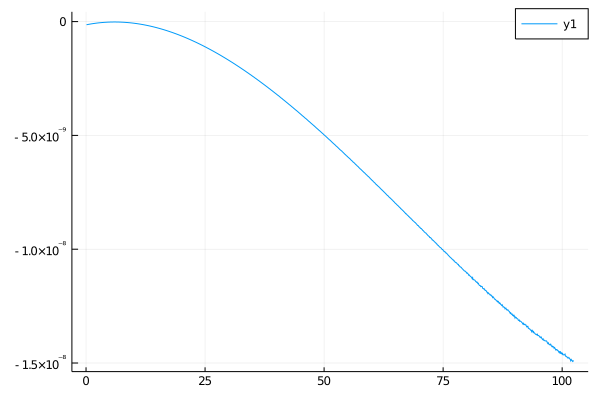

In [32]:
|
plot(x, yhat .- y)